In [13]:
#BLOCO 1: 
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

N = 100
minimum_global = -20
F = 0.8
C = 0.7


---
<h3> Rastrigin Function </h3>

In [14]:
def rastrigin(x):  # objective function
    x = x.reshape(1, -1).T
    Q = np.eye(len(x))
    X = Q.dot(x)

    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
    
    return F[0]

C:\Users\VANDOD~1\AppData\Local\Temp/ipykernel_13856/3037016698.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


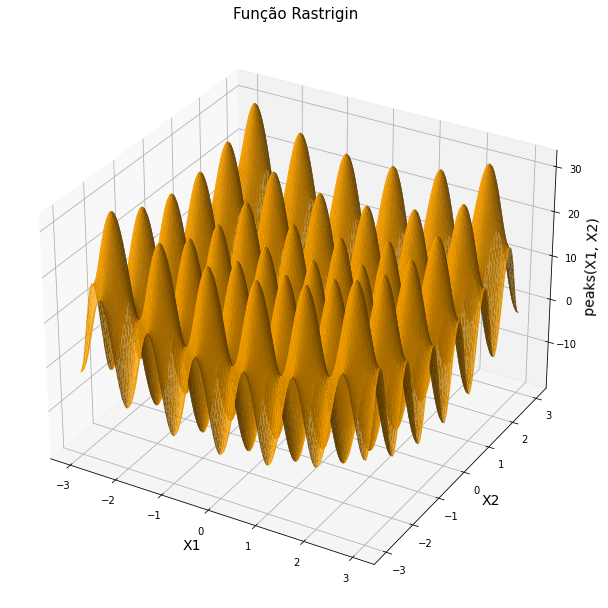

In [15]:
x1 = x2 = np.linspace(-3, 3, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Rastrigin', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

---
# IMPLEMENTAÇÃO


In [16]:
# BLOCO 2: GERANDO A POPULAÇÃO INICIAL
def initPop():
    pop = []                                                         # lista para armazenar a população
    individuo = []                                                   # lista para armazenar um individuo
    for c in range(0,N):                                             # laço para gerar os N indivíduos
        individuo.append(float("{:.4f}".format(rd.uniform(-2,2))))   # gera a coordenada x1 pro individuo
        individuo.append(float("{:.4f}".format(rd.uniform(-2,2))))   # gera a coordenada x2 pro individuo
        pop.append(individuo[:])                                     # adiciona o individuo na população
        individuo.clear()                                            # limpa a lista

    return pop

In [17]:
# BLOCO 3: TESTANDO A FUNÇÃO ACIMA
pop_teste = initPop()
print(pop_teste)

[[-1.9648, 0.2855], [-0.6536, 0.1212], [-1.4479, 0.3453], [-1.1894, 0.9951], [1.1578, 0.3592], [0.601, 1.7187], [-1.7267, 1.3504], [0.7138, 0.3643], [1.0236, -0.2385], [-1.658, 1.9084], [0.3562, -0.2547], [-0.4471, 1.7949], [-1.5088, -0.1322], [-1.3795, -0.5384], [1.5895, 0.1702], [0.166, -1.4181], [0.5966, -1.1695], [-0.8759, -0.4913], [1.3934, 1.3369], [1.3698, 0.7296], [-1.1114, -0.421], [0.2061, 1.76], [1.0505, -1.4479], [-1.7211, 0.649], [-0.2708, 1.9855], [-0.3622, -0.0591], [1.8863, 0.0959], [-1.1837, 1.5276], [1.7403, 1.5696], [-0.1445, -0.28], [-1.8016, -1.8319], [-0.9548, 0.2994], [0.1493, 0.5487], [0.7411, -0.3462], [-1.0519, 1.6455], [-0.3233, 0.4658], [0.7848, -0.282], [-1.1228, -0.1854], [-1.7933, -1.3189], [1.9706, 1.6228], [-1.356, -0.8329], [-1.4614, 0.8874], [-0.7082, 1.1367], [-0.4832, 0.3343], [-1.506, -0.5816], [-1.2956, 0.4787], [1.2181, -1.981], [-0.6528, -0.013], [-1.8097, -1.136], [0.3249, 0.8375], [-1.8031, 0.6712], [1.4562, -1.5776], [-1.6963, 1.3435], [1.443

In [18]:
# BLOCO 4: GERANDO O FITNESS DO INDIVIDUO
def fitness(individuo):  
    individuo_array = np.array(individuo)                                           #cria um array para armazenar o individuo
    f_de_x = rastrigin(individuo_array)                                             #calcula o f(x) do individuo apartir da função rastringin
    distancia = abs(minimum_global) + f_de_x                                        #calcula a distancia f(s) do individuo até o  f(x) do minimo global
    return distancia

In [19]:
# BLOCO 5: TESTANDO A FUNÇÃO ACIMA
fitness_teste = fitness(pop_teste[0])
print(fitness_teste)

16.39761157214081


In [20]:
# BLOCO 6: GERANDO LISTA DE POP_FITNESS DA POPULAÇÃO
def popfitness(pop):
    pop_fitness = []                                                                #cria uma lista para armazenar o fitness da população   
    for c in range(0,N):                                                            #laço para analisar os N individuos
        fitness_ind = fitness(pop[c])                                               #calcula o fitness de cada individuo
        pop_fitness.append(fitness_ind)                                             #coloca o fitness na lista
    return pop_fitness

In [21]:
# BLOCO 7: TESTANDO A FUNÇÃO ACIMA
pop_fitness = popfitness(pop_teste)
print(pop_fitness)

[16.39761157214081, 18.897385662245746, 37.321025017665036, 8.693364347456093, 22.33049095632544, 33.32219389878027, 32.16199812890352, 29.477240219616057, 10.49243969121844, 23.465911705064304, 26.67548936084097, 30.090370397341744, 25.534617242421728, 39.17138224540967, 26.209028401050354, 25.707263319652974, 25.092500871832513, 23.88269912494752, 36.76120573046212, 30.523236279879047, 22.556849754486713, 19.78869779605262, 23.16811910140177, 31.11783252214027, 15.360201294274287, 17.2963842477538, 7.7735591431485815, 29.53840942585549, 35.16032291756628, 15.819229694065534, 18.49419244230185, 14.456154113741015, 23.945472759798506, 26.911029567122746, 20.44538301132475, 34.53597761028793, 20.523367882060015, 10.178519721390714, 26.463395758250535, 23.85500998319798, 23.73465243641778, 25.030523670085284, 17.85729534324784, 35.34208613068035, 41.31338292606802, 34.64440518985205, 13.488359763832687, 16.194278115243257, 14.335939408947262, 20.11628635536166, 25.178189857384883, 43.067

In [22]:
#BLOCO 8: CALCULANDO O F_DE_X DE UM INDIVIDUO
def calcula_f_de_x(individuo):
    ar = np.array(individuo)
    return float("{:.4f}".format(rastrigin(ar)))

In [23]:
# BLOCO 9: TESTANDO A FUNÇÃO ACIMA
f_de_x_teste = calcula_f_de_x(pop_teste[0])
print(f_de_x_teste)

-3.6024


In [24]:
#BLOCO 10: BLOCO PRINCIPAL

## inicialização da população
pop = initPop()                                                                                         #cria a população inicial
pop_fitness = popfitness(pop)                                                                           #analisa o fitness da população
best = min(pop_fitness)                                                                                 #descobre o melhor fitness da população inicial
pos_best = pop_fitness.index(best)                                                                      #descobre a posição do melhor individuo
min_pop = calcula_f_de_x(pop[pos_best])                                                                 #calcula o f(x) do melhor individuo
t = 1                                                                                                   #contador de gerações                          
print(f'Melhor indivíduo inicial: {pop[pos_best]}; Minímo da população: {min_pop}')
while min_pop != minimum_global:                                                                        #laço até encontrar a solução perfeita
    pop_mutante = []                                                                                    #lista para armazenar a população mutante
    individuo = []                                                                                      #lista para armazenar os individuos que serão gerados
    for c in range(0,N):                                                                                #laço para calcular o vetor diferença
        r1 = pop[rd.randint(0,N-1)]
        r2 = pop[rd.randint(0,N-1)]
        r3 = pop[rd.randint(0,N-1)]
        delta = pop[rd.randint(0,N-1)]   
        
        for j in range(0,2):                                                                           
            if (rd.random() <= C or delta == j):
                vetor_diferenca = r2[j] - r3[j]       
                solucao_mutante = r1[j] + F*vetor_diferenca      
                individuo.append(solucao_mutante)
            else:
                individuo.append(pop[c][j]) 
        pop_mutante.append(individuo[:])                                                                #adiciona o individuo na população mutante
                       
        if(fitness(pop_mutante[c]) <= fitness(pop[c])):                                                 #compara o fitness do novo individuo com o antigo
            pop[c] = pop_mutante[c]                                                                     #coloca o novo individuo na população caso seu fitness seja melhor
        individuo.clear()                                                                               #limpa a lista individuo
    pop_mutante.clear()                                                                                 #limpa a lista pop mutante
       
    pop_fitness = popfitness(pop)                                                                       #calcula o fitness da população
    best = min(pop_fitness)                                                                             #descobre o melhor fitness da geração
    pos_best = pop_fitness.index(best)                                                                  #descobre a posição do mlehor individuo
    min_pop = calcula_f_de_x(pop[pos_best])                                                             #descobre o f(x) do melhor individuo
    t = t + 1                                                                                           #incrementa a geração
                                                                                                                                    
print('GERAÇAO: ', t)                                                               
pop[pos_best][0] = float("{:.3f}".format(pop[pos_best][0]))
pop[pos_best][1] = float("{:.3f}".format(pop[pos_best][1]))
print(f'Melhor indivíduo final: {pop[pos_best]}; Minímo da população: {min_pop}')



Melhor indivíduo inicial: [1.0125, 0.0078]; Minímo da população: -18.9319
GERAÇAO:  41
Melhor indivíduo final: [0.0, 0.0]; Minímo da população: -20.0
